#### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Subtask 1

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

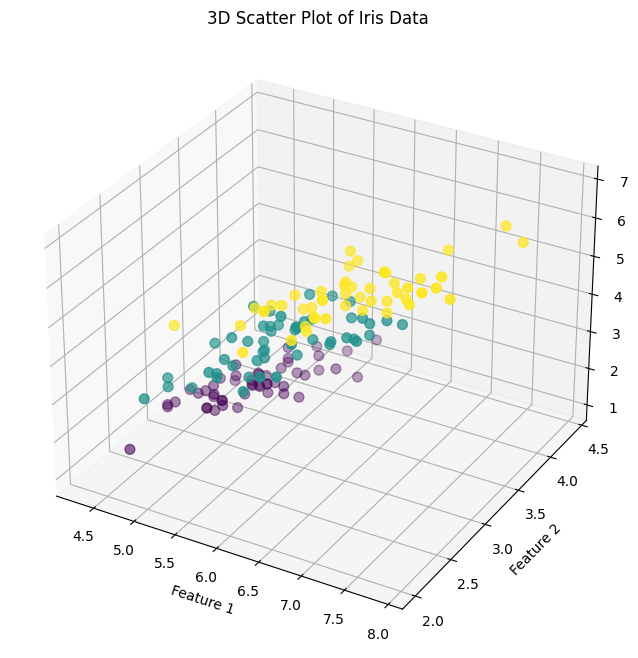

In [3]:
# Plot the first 3 columns of the dataset in a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=50)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot of Iris Data')
plt.show()

In [4]:
class myPCA:
    def __init__(self, n_components : int = 2 , method :
        str = 'svd') -> None:
        '''
        The constructor of the PCA algorithm.
        :param n_compoents: int, default = 2
        The dimension to which the data will be
        reduced.
        :param method: str, default = ’svd’
        The method used by PCA to reduce the
        dimensionality of the data.
        '''
        self.__n_components = n_components
        if method in ['svd', 'eigen']:
            self.__method = method
        else:
            raise ValueError(f"'{method}' is not a method implemented in this model")
    def fit(self, X : 'np.array'):
        '''
        The fitting method.
        :param X: np.array
        The data on which we want to fit the PCA
        '''
        if self.__method == 'svd':
            U, S, V = np.linalg.svd(X)
            self.__V = V[:self.__n_components, :]
        elif self.__method == 'eigen':
            corr_mat = np.corrcoef(X.T)
            # Getting the eigenvectors and eigenvalues
            self.eig_vals, self.eig_vecs = np.linalg.eig(corr_mat)
            # Sorting the list of tuples (eigenvalue, eigenvector)
            self.eig_pairs = [(np.abs(self.eig_vals[i]),
            self.eig_vecs[:, i]) for i in range(len(self.eig_vals))]
            self.eig_pairs.sort(key=lambda x: x[0], reverse=True)
            # Calculating the explained ration
            total = sum(self.eig_vals)
            self.explained_variance_ratio = [(i/total)* 100
            for i in sorted(self.eig_vals, reverse= True)]
            self.cumulative_variance_ratio = np.cumsum(self.explained_variance_ratio)
            # Creating the projection matrix
            self.matrix_w = np.hstack((self.eig_pairs[i][1].reshape(np.size(X, 1),1) 
                                    for i in range(self.__n_components)))
        return self
    def transform(self, X : 'np.array') -> 'np.array':
        '''
        The transform function.
        :param X: np.array
        The data that we must reduce.
        '''
        if self.__method == 'svd':
            return X.dot(self.__V.T)
        elif self.__method == 'eigen':
            return X.dot(self.matrix_w)

In [5]:
# Apply StandardScaler on the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create an instance of myPCA using Eigen method
custom_pca_eigen = myPCA(n_components=2, method='eigen')
reduced_data_eigenvector = custom_pca_eigen.fit(X_scaled).transform(X_scaled)

# Create an instance of myPCA using SVD method
custom_pca_svd = myPCA(n_components=2, method='svd')
reduced_data_svd = custom_pca_svd.fit(X_scaled).transform(X_scaled)

# Create an instance of sklearn PCA algorithm
sklearn_pca = PCA(n_components=2)
reduced_data_sklearn = sklearn_pca.fit_transform(X_scaled)

C:\Users\Max\AppData\Local\Temp\ipykernel_17604\148416740.py:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  self.matrix_w = np.hstack((self.eig_pairs[i][1].reshape(np.size(X, 1),1)


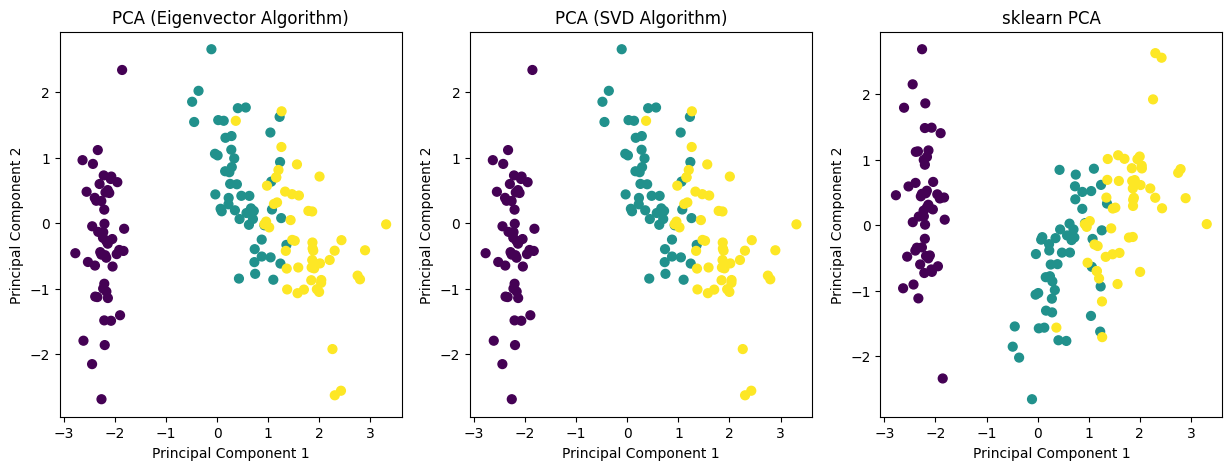

In [6]:
# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for the eigenvector algorithm
axes[0].scatter(reduced_data_eigenvector[:, 0], reduced_data_eigenvector[:, 1], c=y, cmap='viridis', s=40)
axes[0].set_title('PCA (Eigenvector Algorithm)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# Plot for the SVD algorithm
axes[1].scatter(reduced_data_svd[:, 0], reduced_data_svd[:, 1], c=y, cmap='viridis', s=40)
axes[1].set_title('PCA (SVD Algorithm)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

# Plot for sklearn PCA
axes[2].scatter(reduced_data_sklearn[:, 0], reduced_data_sklearn[:, 1], c=y, cmap='viridis', s=40)
axes[2].set_title('sklearn PCA')
axes[2].set_xlabel('Principal Component 1')
axes[2].set_ylabel('Principal Component 2')

plt.show()

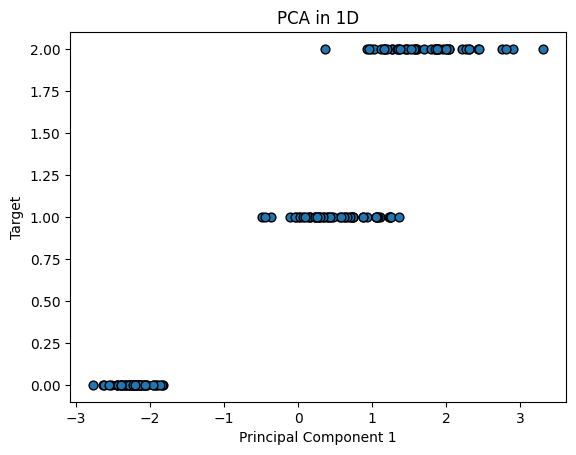

In [7]:
# Retrain a sklearn PCA model on the iris Data Set with n_components set to 1
sklearn_pca_1d = PCA(n_components=1)
X_pca_1d = sklearn_pca_1d.fit_transform(X_scaled)

# Plot the result in 1D
plt.scatter(X_pca_1d, y, edgecolor='k', s=40)
plt.title('PCA in 1D')
plt.xlabel('Principal Component 1')
plt.ylabel('Target')
plt.show()

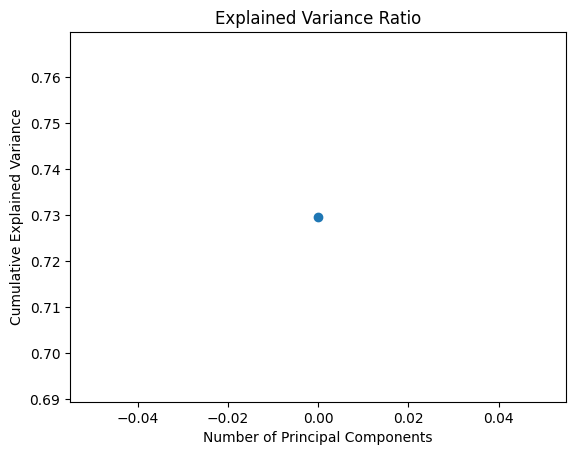

In [8]:
# Plot the explained variance ratio
explained_variance_ratio = sklearn_pca_1d.explained_variance_ratio_

# Create a line plot
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

#### 1. Однозначность основной структуры данных
Ваш набор данных может иметь сильную основную структуру, которая может быть представлена всего лишь одной главной компонентой. Это может быть характерно для данных, которые, например, представляют собой линейную зависимость.

#### 2. Ограниченная вариация
Если ваш набор данных имеет ограниченное количество разнообразия или широкий размах вариаций, то одна главная компонента может быть достаточной для объяснения большей части этой вариации.

#### 3. Избыточность информации 
Наш набор данных может быть относительно простым, и использование более одной главной компоненты просто избыточно.

#### Subtask 2

In [9]:
# Load the digit dataset
digits = load_digits()

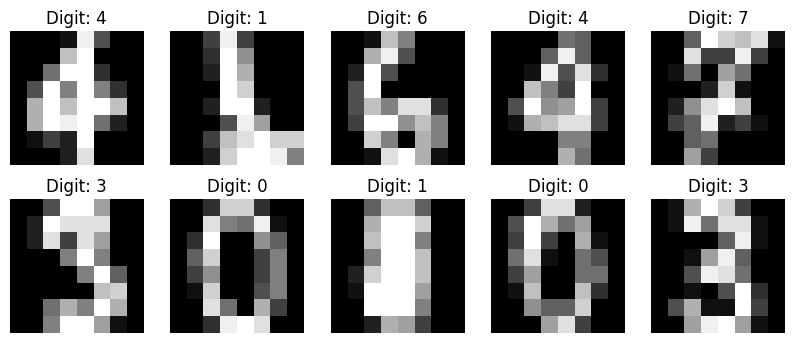

In [10]:
# Plot 10 random digits in a 2 x 5 grid
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(2):
    for j in range(5):
        random_index = np.random.randint(len(digits.images))
        axes[i, j].imshow(digits.images[random_index], cmap='gray')
        axes[i, j].set_title(f'Digit: {digits.target[random_index]}')
        axes[i, j].axis('off')

plt.show()

In [11]:
# Apply StandardScaler on the digit data
scaler = StandardScaler()
digits_scaled = scaler.fit_transform(digits.data)

In [12]:
# Create an instance of scikit-learn PCA algorithm
pca = PCA(n_components=2)

# Train PCA on the digit data
digits_pca = pca.fit_transform(digits_scaled)

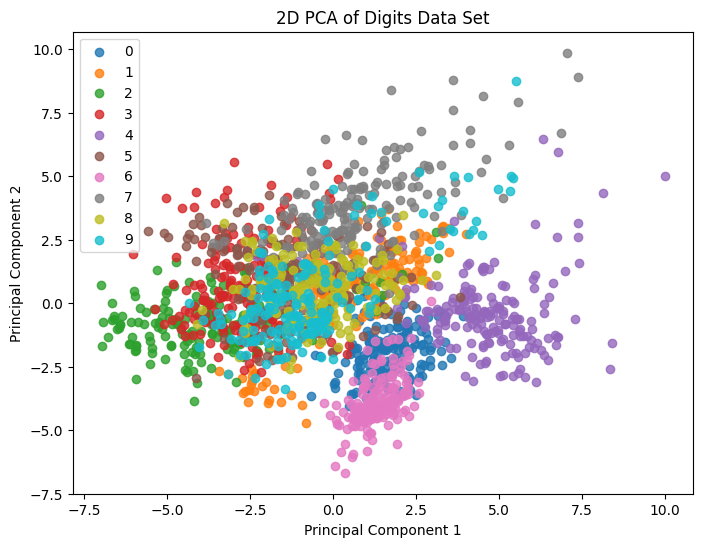

In [13]:
# Plot the result Data Set in a scatter plot
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(digits_pca[digits.target == i, 0], digits_pca[digits.target == i, 1], label=str(i), alpha=0.8)

plt.title('2D PCA of Digits Data Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

График рассеяния, созданный приведенным выше кодом, является визуализацией уменьшенного измерения набора данных цифр после применения метода главных компонент (PCA). Каждая точка на графике представляет изображение цифры, и ее положение определяется первыми двумя главными компонентами.